In [ ]:
###三次B样条
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

# 控制点
control_points = np.array([
    [0.0, 0.0],
    [1.0, 2.0],
    [2.0, 0.5],
    [3.0, 3.0],
    [4.0, 1.0]
])

# 提取x和y坐标
control_x = control_points[:, 0]
control_y = control_points[:, 1]

# 节点矢量（均匀节点）
n = len(control_points) - 1  # 控制点数量 - 1
k = 3  # B样条阶数（三次）
# 节点矢量：开头和结尾重复k+1次以确保曲线经过端点
knots = np.concatenate((np.zeros(k), np.arange(n - k + 2), np.full(k, n - k + 1)))

# 创建B样条
spline_x = BSpline(knots, control_x, k)
spline_y = BSpline(knots, control_y, k)

# 生成样条曲线上的点
t = np.linspace(0, n - k + 1, 100)  # 参数范围
curve_x = spline_x(t)
curve_y = spline_y(t)

# 绘制结果
plt.figure(figsize=(8, 6))

# 绘制控制点
plt.plot(control_x, control_y, 'o--', label='Control Points')

# 绘制B样条曲线
plt.plot(curve_x, curve_y, '-', label='B-Spline Curve', color='blue')

# 添加标签和图例
plt.title("Cubic B-Spline Curve")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()

plt.show()


: 

In [ ]:
###B样条曲面
import numpy as np
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义控制点网格
control_points_x = np.array([[-1, -0.5, 0, 0.5, 1],
                              [-1, -0.5, 0, 0.5, 1],
                              [-1, -0.5, 0, 0.5, 1],
                              [-1, -0.5, 0, 0.5, 1],
                              [-1, -0.5, 0, 0.5, 1]])

control_points_y = np.array([[-1, -1, -1, -1, -1],
                              [-0.5, -0.5, -0.5, -0.5, -0.5],
                              [0, 0, 0, 0, 0],
                              [0.5, 0.5, 0.5, 0.5, 0.5],
                              [1, 1, 1, 1, 1]])

control_points_z = np.array([[0, 0.5, 1, 0.5, 0],
                              [0.5, 1, 1.5, 1, 0.5],
                              [1, 1.5, 2, 1.5, 1],
                              [0.5, 1, 1.5, 1, 0.5],
                              [0, 0.5, 1, 0.5, 0]])

# 生成网格
u = np.linspace(0, 1, 100)  # U方向参数
v = np.linspace(0, 1, 100)  # V方向参数

# 在U方向生成样条
surfaces = []
for i in range(control_points_x.shape[1]):
    tck_u, _ = splprep([control_points_x[:, i], control_points_y[:, i], control_points_z[:, i]], s=0, k=3)
    surfaces.append(splev(u, tck_u))

eval_x_u = np.array([s[0] for s in surfaces])
eval_y_u = np.array([s[1] for s in surfaces])
eval_z_u = np.array([s[2] for s in surfaces])

# 在V方向生成样条
surfaces = []
for i in range(control_points_x.shape[0]):
    tck_v, _ = splprep([control_points_x[i, :], control_points_y[i, :], control_points_z[i, :]], s=0, k=3)
    surfaces.append(splev(v, tck_v))

eval_x_v = np.array([s[0] for s in surfaces])
eval_y_v = np.array([s[1] for s in surfaces])
eval_z_v = np.array([s[2] for s in surfaces])

# 创建曲面网格
eval_x = np.outer(eval_x_u[:, 0], eval_x_v[0, :])
eval_y = np.outer(eval_y_u[:, 0], eval_y_v[0, :])
eval_z = np.outer(eval_z_u[:, 0], eval_z_v[0, :])

# 绘制曲面
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(eval_x, eval_y, eval_z, cmap='viridis', edgecolor='none')

# 添加颜色条和标题
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
ax.set_title("B-Spline Surface")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


: 

/root/anaconda3/envs/hb/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25511 (\N{CJK UNIFIED IDEOGRAPH-63A7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/anaconda3/envs/hb/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21046 (\N{CJK UNIFIED IDEOGRAPH-5236}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/anaconda3/envs/hb/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22810 (\N{CJK UNIFIED IDEOGRAPH-591A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/anaconda3/envs/hb/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36793 (\N{CJK UNIFIED IDEOGRAPH-8FB9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/anaconda3/envs/hb/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24418 (\N{CJK UNIFIED IDE

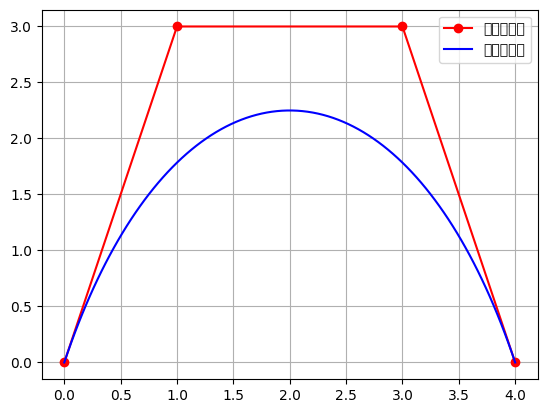

In [1]:
#使用De Casteljau绘制贝塞尔曲线
import numpy as np
import matplotlib.pyplot as plt

def de_casteljau(P0, P1, P2, P3, t):
    # 第一层插值
    Q0 = (1 - t) * P0 + t * P1
    Q1 = (1 - t) * P1 + t * P2
    Q2 = (1 - t) * P2 + t * P3
    
    # 第二层插值
    R0 = (1 - t) * Q0 + t * Q1
    R1 = (1 - t) * Q1 + t * Q2
    
    # 第三层插值
    B = (1 - t) * R0 + t * R1
    
    return B

# 控制点
P0 = np.array([0, 0])
P1 = np.array([1, 3])
P2 = np.array([3, 3])
P3 = np.array([4, 0])

# 绘制控制点和控制多边形
control_points = np.array([P0, P1, P2, P3])
plt.plot(control_points[:, 0], control_points[:, 1], 'ro-', label="控制多边形")

# 生成贝塞尔曲线
t_values = np.linspace(0, 1, 100)
bezier_curve = np.array([de_casteljau(P0, P1, P2, P3, t) for t in t_values])

# 绘制贝塞尔曲线
plt.plot(bezier_curve[:, 0], bezier_curve[:, 1], 'b-', label="贝塞尔曲线")

plt.legend()
plt.grid(True)
plt.show()
